<a href="https://colab.research.google.com/github/gg5d/Computational_Linear_Algebra/blob/main/Labs/Lab2_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 (1/24/25)


## K-Means Clustering

Useful Textbook (K-Means Clustering Section): https://www.statlearning.com/



In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MMiDS-textbook/MMiDS-textbook.github.io/refs/heads/main/utils/datasets/penguins-measurements.csv')

# TODO: drop all rows with na values

In [ ]:

## TODO: print the first 5 rows of the dataframe


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [ ]:
## TODO Create a variable that lists each column name (in order)
# create column list and assign it to the variable feature_names
#feature_names =

In [ ]:

## TODO: turn the pandas df into a numpy array called X
#X = _____

# Lloyd's Algorithm (K-Means Clustering Algorithm)
### Code from Chapter 2.3 in the book

### Supervised vs Unsupervised Learning
K-means clustering is an unsupervised learning method. Supervised learning uses the labels during training, unsupervised does not have access to the labels during training.

In [ ]:
def opt_reps(X, k, assign):
    (n, d) = X.shape
    reps = np.zeros((k, d))
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    print(G)
    return assign

def kmeans(rng, X, k, maxiter=5):
    (n, d) = X.shape
    assign = rng.integers(0,k,n)
    reps = np.zeros((k, d), dtype=int)
    for iter in range(maxiter):
        reps = opt_reps(X, k, assign)
        assign = opt_clust(X, k, reps)
    return assign

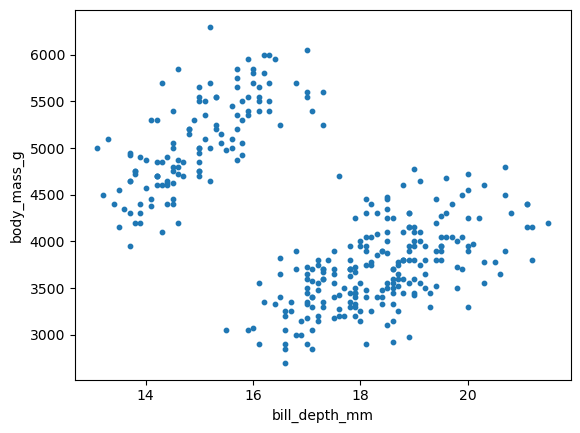

In [ ]:
# Plot two variables
plt.scatter(X[:,1], X[:,3], s=10)
plt.xlabel('bill_depth_mm')
plt.ylabel('body_mass_g')
plt.show()

In [ ]:
# Plot with two different variables (change axis titles accordingly)



Knowledge Check: Why do we want to standardize the vectors when we are using k-means clustering? (Hint: Does distance matter?)

In [ ]:

# TODO complete the code below
#mean = _______   # Compute mean for each column
#std = _______  # Compute standard deviation for each column
#X = _______  # Standardize each column
#print(mean,std)

[  43.92192982   17.15116959  200.91520468 4201.75438596] [  5.45159602   1.97190392  14.04114057 800.78122924]


# 2 Clusters

In [ ]:

#TODO: Check section 1.3.2. for how to assign clusters - do for k=2
#assign = _______

1337.3535017777483
578.4819440115109
569.5843202262888
565.8219042552229
565.7076453796291


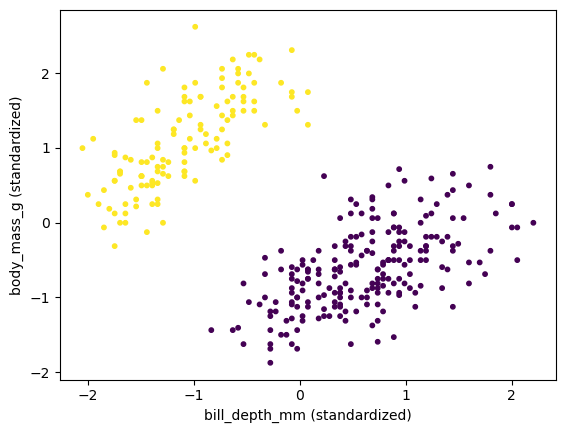

In [ ]:
# Color plot with centroid assignment from algorithm
plt.scatter(X[:,1], X[:,3], c=assign, s=10)
plt.xlabel('bill_depth_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

# 6 Clusters

In [ ]:

# TODO: Check section 1.3.2. for how to assign clusters - do for k=6
#assign = _______

1122.6198508110783
312.9600532393612
239.80306376068916
211.30844274605198
206.03311145500356


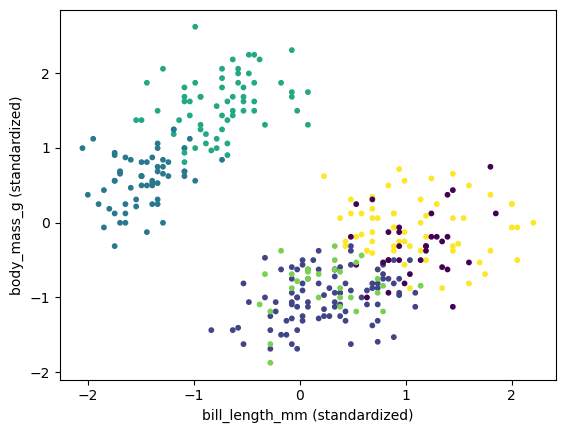

In [ ]:
# Notice how the clustering/coloring changes with 6 clusters instead of 2
plt.scatter(X[:,1], X[:,3], c=assign, s=10)
plt.xlabel('bill_depth_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

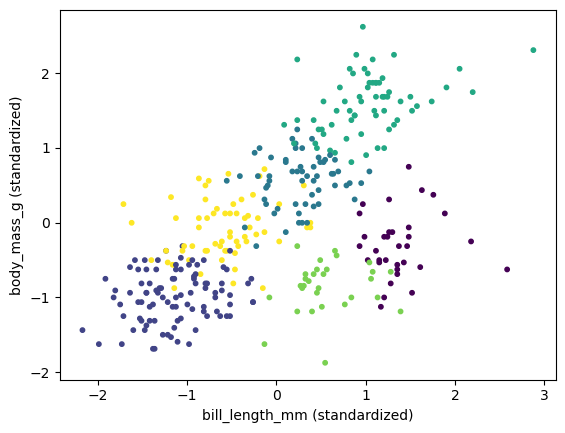

In [ ]:
# Plot a different variable on x
plt.scatter(X[:,0], X[:,3], c=assign, s=10)
plt.xlabel('bill_length_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

# View in 3D

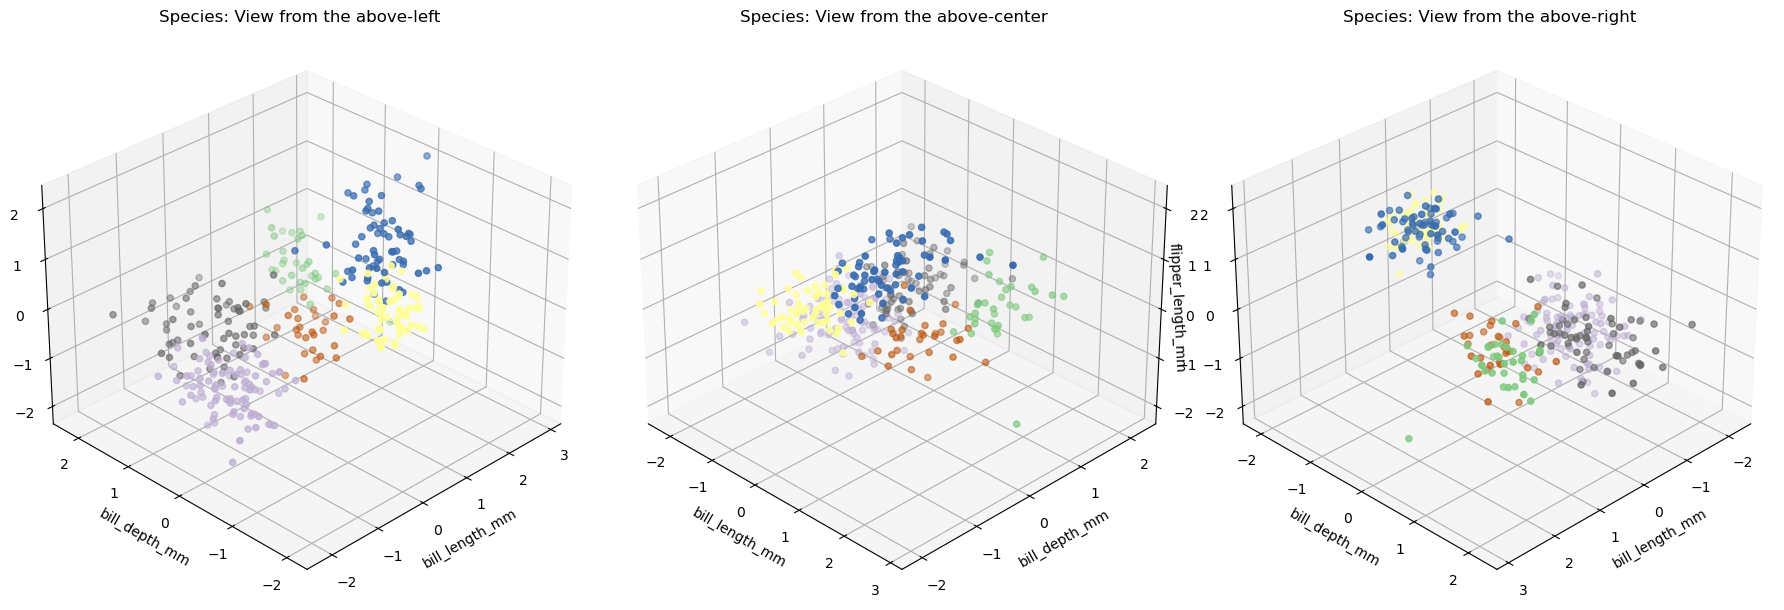

In [ ]:
# Run this code to produce 3D plots of your features from different angles - you can play around with which 3 columns are visualized and k if you like

def my_scatter(data, colors, labels=feature_names, **kwargs):
    title = kwargs.pop('title', '')
    if title:
        title += ': '

    fig = plt.figure(figsize=(18, 6))  # Adjusted figure size to accommodate 3 plots

    if np.max(colors) != 0:
        normalized_colors = colors/np.max(colors)
    else:
        normalized_colors = colors
    # First subplot: original viewing angle
    ax1 = fig.add_subplot(132, projection='3d', xlabel=labels[0], ylabel=labels[1], zlabel=labels[2])
    ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=normalized_colors, s=20, cmap='Accent') # note it only shows the first 3 columns of the data
    ax1.view_init(elev=30, azim=-45)  # Rotate by another 90 degrees (180 degrees total)
    plt.title(f"{title}View from the above-center")

    # Second subplot: rotated view by 90 degrees
    ax2 = fig.add_subplot(133, projection='3d', xlabel=labels[0], ylabel=labels[1], zlabel=labels[2])
    ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=normalized_colors, s=20, cmap='Accent')
    ax2.view_init(elev=30, azim=ax1.azim+90)  # Rotate by 90 degrees
    plt.title(f"{title}View from the above-right")

    # Third subplot: rotated view by 90 degrees in the opposite direction
    ax3 = fig.add_subplot(131, projection='3d', xlabel=labels[0], ylabel=labels[1], zlabel=labels[2])
    ax3.scatter(data[:, 0], data[:, 1], data[:, 2], c=normalized_colors, s=20, cmap='Accent')
    ax3.view_init(elev=30, azim=ax1.azim-90)  # Rotate by another 90 degrees
    plt.title(f"{title}View from the above-left")

    # Display the plot
    plt.tight_layout()
    plt.show()

    return ax1

# Run function
my_scatter(X, assign, title="Species");

# Elbow Plots

An elbow plot is a graphical tool used to determine the optimal number of clusters in a clustering algorithm, such as K-means. It helps identify the point where adding more clusters no longer significantly improves the clustering performance (because we want clusters that are meaningful and interpretable). This is referred to as the "elbow point."

### How Does It Work?
Metric of Interest: The plot displays a metric on the y-axis that measures the clustering performance. For K-means, this metric is usually the sum of squared distances (SSD), also known as "inertia." This measures how tightly the data points are grouped within each cluster.

**Number of Clusters:** The x-axis represents the number of clusters (𝑘).

**Trend:** As the number of clusters increases:

The SSD decreases because each cluster becomes smaller, leading to points being closer to their cluster centroids.
Initially, this decrease is rapid because splitting data into more clusters significantly reduces the distances.
After a certain point, the decrease slows down, showing diminishing returns.


### The Elbow Point
The elbow point is where the SSD curve starts to flatten. This indicates the optimal number of clusters:

Adding more clusters beyond this point does not significantly improve the clustering.
It balances between underfitting (too few clusters) and overfitting (too many clusters).

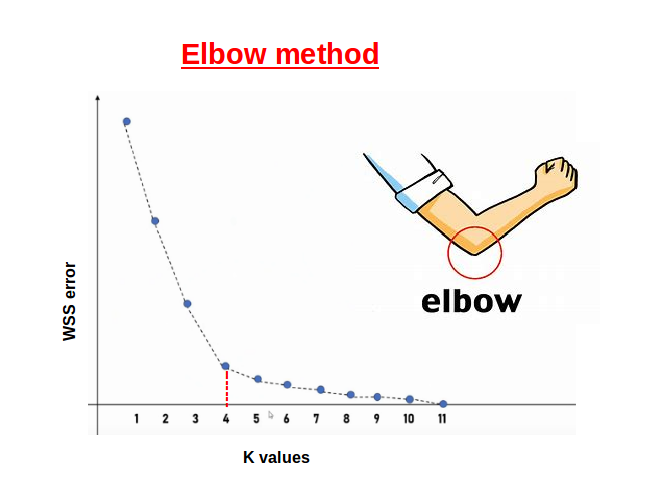

You will be using this method in your Project 1 and comparing it to the silhouette score method for determining the best k